In [2]:
import numpy as np
import pandas as pd

# Load parameters and dataset

In [3]:
parameters = pd.read_csv('/Users/ahalder/work/Integrated_3PCF/i3PCF/data/cosmo_parameters/i3PCF_sobol_training_2.6e5_nodes_part1.csv')

parameters

,Omega_m,A_s,w0,h,z,c_min
0,0.460424,1.660429e-09,-0.448337,0.889134,0.526256,5.069300
1,0.164073,5.256174e-09,-2.549402,0.636170,2.288480,2.994849
2,0.270179,3.456163e-09,-1.412331,0.737546,1.621062,0.609466
3,0.355081,6.252506e-09,-3.274889,0.652936,1.194285,4.059184
4,0.303968,2.716942e-09,-1.947522,0.704793,0.888568,5.578121
...,...,...,...,...,...,...
262139,0.303970,4.370100e-09,-2.888037,0.572479,1.852476,3.968100
262140,0.355078,1.660376e-09,-2.334765,0.607469,1.533497,5.497163
262141,0.270180,5.256130e-09,-0.668392,0.871607,0.651394,2.050381
262142,0.164073,3.456214e-09,-3.488377,0.680308,0.128017,1.728482


In [4]:
P_l_data = np.load('/Users/ahalder/work/Integrated_3PCF/i3PCF/output/grids/P_nl_grids_l80_shear_x_shear_COSMOGRIDV1_fiducial_no_neutrinos_i3PCF_sobol_training_2.6e5_nodes_part1.npy')

P_l_data.shape

(262144, 80)

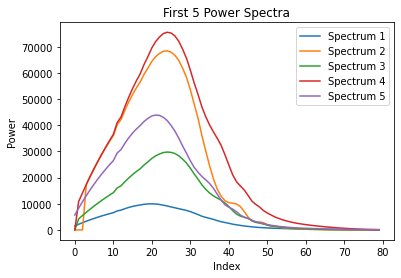

    Omega_m           A_s        w0         h         z     c_min
0  0.460424  1.660429e-09 -0.448337  0.889134  0.526256  5.069300
1  0.164073  5.256174e-09 -2.549402  0.636170  2.288480  2.994849
2  0.270179  3.456163e-09 -1.412331  0.737546  1.621062  0.609466
3  0.355081  6.252506e-09 -3.274889  0.652936  1.194285  4.059184
4  0.303968  2.716942e-09 -1.947522  0.704793  0.888568  5.578121


In [5]:
import matplotlib.pyplot as plt

# Plot the first 5 power spectra
for i in range(5):
    plt.plot(P_l_data[i], label=f'Spectrum {i+1}')

plt.xlabel('Index')
plt.ylabel('Power')
plt.title('First 5 Power Spectra')
plt.legend()
plt.show()

# Display the corresponding cosmological parameters
print(parameters.head(5))